<a href="https://colab.research.google.com/github/ShakilM26/employee-analysis.project/blob/main/project_employee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv('employee.csv')
df.head(5)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
0,Andreana Nelthropp,M,76864 Holmberg Lane,Japan,Hiroshima Jogakuin University,Payment Adjustment Coordinator,Dynava,$93600.17,visa-electron,$88864.70,NaN,24/06/1996,XS
1,Janet Angear,M,95564 Autumn Leaf Place,Spain,Universidad Abierta Interactiva,Project Manager,Brainverse,$31546.34,visa,$484569.29,Mazda,28/05/1999,XL
2,Julian Desport,F,12802 Pierstorff Circle,Russia,St. Petersburg State Cinema and TV University,Speech Pathologist,Wikido,$28385.32,instapayment,$208092.27,Peugeot,03/06/1996,2XL
3,Jock Olorenshaw,M,20 Kedzie Hill,Russia,Nevsky Institute of Language and Culture,Executive Secretary,Blogpad,$51164.86,mastercard,$248698.69,Jaguar,15/02/1994,XL
4,Ethelred McConigal,M,363 Dottie Crossing,Canada,Carleton University,Quality Control Specialist,Blogtags,$62046.15,solo,$316809.49,GMC,01/02/1991,XS


In [3]:
df.isnull().sum()

full_name       0
gender          0
address         0
country         0
university      0
job_title       0
company        60
salary         59
credit_card    17
balance        39
vehicle        55
birthday        0
shirt_size      0
dtype: int64

# **Data Cleaning**

****We can see that our dataset has some null values. I will print only those columns that have null values. Then we start our cleaning operations.****

In [4]:
df.columns[df.isnull().any()]

Index(['company', 'salary', 'credit_card', 'balance', 'vehicle'], dtype='object')

In [5]:
cols = df.columns[df.isnull().any()]
df[cols].isnull().sum()

company        60
salary         59
credit_card    17
balance        39
vehicle        55
dtype: int64

In [6]:
# percentage of null values 

for col in df.columns:
    missing_percent = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_percent*100)))

full_name - 0%
gender - 0%
address - 0%
country - 0%
university - 0%
job_title - 0%
company - 6%
salary - 6%
credit_card - 2%
balance - 4%
vehicle - 6%
birthday - 0%
shirt_size - 0%


**Here we visualize this null values of our dataset using seaborn. we can clearly see that we have null values in salary, balance and vehicle column.**

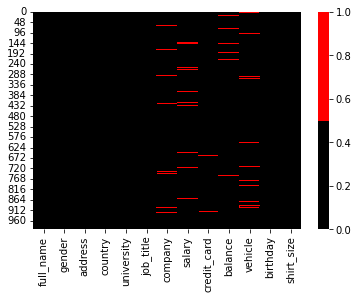

In [7]:
# 
cols = df.columns
colors = ['black', 'red']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))

**We can't fill our values using median,mean or any other method. because there are '$' sign.**
**We have to get rid of it.**

In [8]:
df['salary'] = df['salary'].replace(r'\$', r'', regex=True)

In [9]:
df['balance'] = df['balance'].replace(r'\$', r'', regex=True)

In [10]:
# Now check again and '$' sign is vanish. 
df.head(1)

,full_name,gender,address,country,university,job_title,company,salary,credit_card,balance,vehicle,birthday,shirt_size
0,Andreana Nelthropp,M,76864 Holmberg Lane,Japan,Hiroshima Jogakuin University,Payment Adjustment Coordinator,Dynava,93600.17,visa-electron,88864.70,NaN,24/06/1996,XS


Now here is the thing. we remove '$' sign so that we can fill our nan values. but if we check our datatype we can see that our integer columns represent an object. There is no numeric columns. so we have to make it numeric. then we convert it to an integer. 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      940 non-null    object
 7   salary       941 non-null    object
 8   credit_card  983 non-null    object
 9   balance      961 non-null    object
 10  vehicle      945 non-null    object
 11  birthday     1000 non-null   object
 12  shirt_size   1000 non-null   object
dtypes: object(13)
memory usage: 101.7+ KB


In [12]:
# Make it numeric.

df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['balance'] = pd.to_numeric(df['balance'], errors='coerce')

In [13]:
# make it integer. but still we have nan values and cannot convert float to integer.
# I'm using median value fill our nan values

median_salary = df['salary'].median()
print(median_salary)

median_balance = df['balance'].median()
print(median_balance)

66477.57
315952.68


In [14]:
df['salary'] = df['salary'].fillna(median_salary)
df['balance'] = df['balance'].fillna(median_balance)

# I checked again and there are no more null values ​​in these two columns. Now make it integer.

In [15]:
df['salary'] = df['salary'].apply(np.int64)
df['balance'] = df['balance'].apply(np.int64)
df.info()

# You can clearly see that we have converted these columns to an integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    1000 non-null   object
 1   gender       1000 non-null   object
 2   address      1000 non-null   object
 3   country      1000 non-null   object
 4   university   1000 non-null   object
 5   job_title    1000 non-null   object
 6   company      940 non-null    object
 7   salary       1000 non-null   int64 
 8   credit_card  983 non-null    object
 9   balance      1000 non-null   int64 
 10  vehicle      945 non-null    object
 11  birthday     1000 non-null   object
 12  shirt_size   1000 non-null   object
dtypes: int64(2), object(11)
memory usage: 101.7+ KB


However, our dataset contains other object columns that have null values. Some columns we will use to track our null values.
And some columns we will fill depending on the value of our other columns.



In [16]:
# so after all this things I decided to fill company columns.

df = df.fillna(value={'company':'Google'}, limit=20)

In [ ]:
# after all this operation we've  completed our cleaning part.